('Age Compatibility', 8.444444444444445)
('Money Compatibility', 5.742004264392324)
('Looks Compatibility', 8.444444444444445)


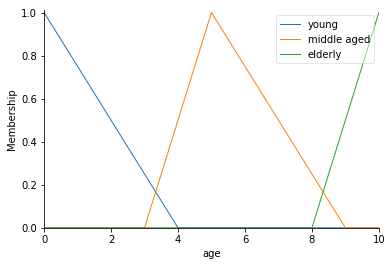

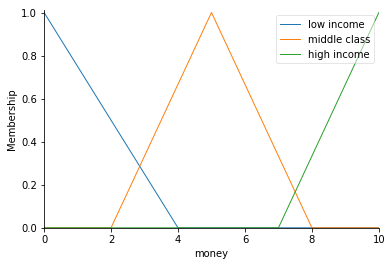

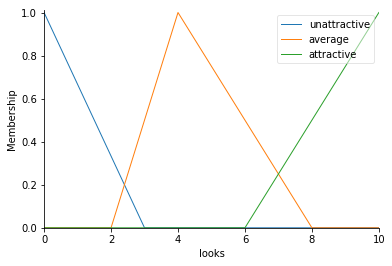

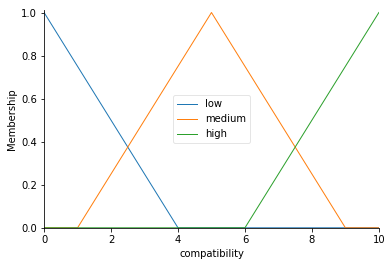

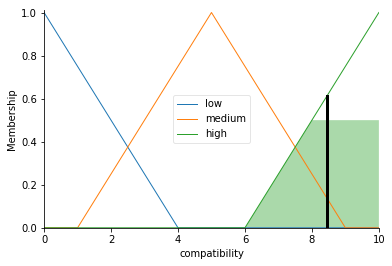

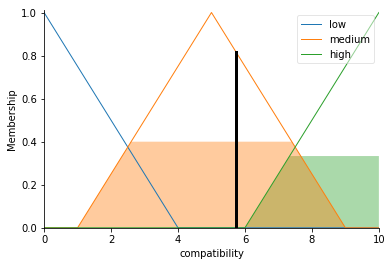

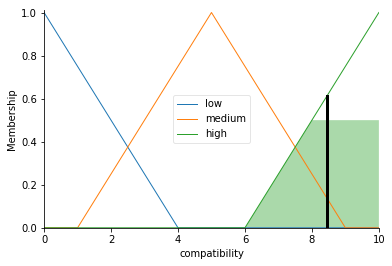

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings('ignore')

# Create Antedecents and Consequent
age = ctrl.Antecedent(np.arange(0, 11, 1), 'age')
money = ctrl.Antecedent(np.arange(0, 11, 1), 'money')
looks = ctrl.Antecedent(np.arange(0, 11, 1), 'looks')
age2 = ctrl.Antecedent(np.arange(0, 11, 1), 'age2')
money2 = ctrl.Antecedent(np.arange(0, 11, 1), 'money2')
looks2 = ctrl.Antecedent(np.arange(0, 11, 1), 'looks2')
compat = ctrl.Consequent(np.arange(0, 11, 1), 'compatibility')

# Assign Membership Functions for person 1 & 2
age['young'] = fuzz.trimf(age.universe, [0, 0, 4])
age['middle aged'] = fuzz.trimf(age.universe, [3, 5, 9])
age['elderly'] = fuzz.trimf(age.universe, [8, 10, 10])
money['low income'] = fuzz.trimf(money.universe, [0, 0, 4])
money['middle class'] = fuzz.trimf(money.universe, [2, 5, 8])
money['high income'] = fuzz.trimf(money.universe, [7, 10, 10])
looks['unattractive'] = fuzz.trimf(looks.universe, [0, 0, 3])
looks['average'] = fuzz.trimf(looks.universe, [2, 4, 8])
looks['attractive'] = fuzz.trimf(looks.universe, [6, 10, 10])

age2['young'] = fuzz.trimf(age.universe, [0, 0, 3])
age2['middle aged'] = fuzz.trimf(age.universe, [2, 5, 9])
age2['elderly'] = fuzz.trimf(age.universe, [8, 10, 10])
money2['low income'] = fuzz.trimf(money.universe, [0, 0, 5])
money2['middle class'] = fuzz.trimf(money.universe, [2, 5, 8])
money2['high income'] = fuzz.trimf(money.universe, [5, 10, 10])
looks2['unattractive'] = fuzz.trimf(looks.universe, [0, 0, 4])
looks2['average'] = fuzz.trimf(looks.universe, [3, 5, 8])
looks2['attractive'] = fuzz.trimf(looks.universe, [6, 10, 10])

compat['low'] = fuzz.trimf(compat.universe, [0, 0, 4])
compat['medium'] = fuzz.trimf(compat.universe, [1, 5, 9])
compat['high'] = fuzz.trimf(compat.universe, [6, 10, 10])

# Show membership functions
age.view()
money.view()
looks.view()
compat.view()

# Fuzzy rules based on age
rule1_age = ctrl.Rule(age['young'] & age2['young'], compat['high'])
rule2_age = ctrl.Rule(age['middle aged'] & age2['middle aged'], compat['high'])
rule3_age = ctrl.Rule(age['elderly'] & age2['elderly'], compat['high'])
rule4_age = ctrl.Rule(age['middle aged'] & (age2['young'] | age2['elderly']), compat['medium'])
rule5_age = ctrl.Rule(age['young'] & age2['elderly'], compat['low'])
rule6_age = ctrl.Rule(age['young'] & age2['middle aged'], compat['medium'])
age_ctrl = ctrl.ControlSystem([rule1_age, rule2_age, rule3_age, rule4_age, rule5_age, rule6_age])
age_compat = ctrl.ControlSystemSimulation(age_ctrl)

# Fuzzy rules based on money
rule1_mon = ctrl.Rule(money['low income'] & money2['low income'], compat['medium'])
rule2_mon = ctrl.Rule(money['middle class'] & money2['middle class'], compat['high'])
rule3_mon = ctrl.Rule(money['high income'] & money2['high income'], compat['high'])
rule4_mon = ctrl.Rule(money['middle class'] & (money2['low income'] | money2['high income']), compat['medium'])
rule5_mon = ctrl.Rule(money['low income'] & money2['high income'], compat['medium'])
rule6_mon = ctrl.Rule((money['low income'] | money['middle class']) & money2['high income'], compat['medium'])
money_ctrl = ctrl.ControlSystem([rule1_mon, rule2_mon, rule3_mon, rule4_mon, rule5_mon])
money_compat = ctrl.ControlSystemSimulation(money_ctrl)

# Fuzzy rules based on looks
rule1_lks = ctrl.Rule(looks['unattractive'] & looks2['unattractive'], compat['medium'])
rule2_lks = ctrl.Rule(looks['average'] & looks2['average'], compat['high'])
rule3_lks = ctrl.Rule(looks['attractive'] & looks2['attractive'], compat['high'])
rule4_lks = ctrl.Rule(looks['average'] & (looks2['unattractive'] | looks2['attractive']), compat['medium'])
rule5_lks = ctrl.Rule(looks['unattractive'] & looks2['attractive'], compat['low'])
rule6_lks = ctrl.Rule(looks['unattractive'] & looks2['average'], compat['medium'])
rule7_lks = ctrl.Rule(looks['attractive'] & looks2['unattractive'], compat['low'])
looks_ctrl = ctrl.ControlSystem([rule1_lks, rule2_lks, rule3_lks, rule4_lks, rule5_lks, rule6_lks, rule7_lks])
looks_compat = ctrl.ControlSystemSimulation(looks_ctrl)


# Test Case
age_compat.input['age'] = 4
age_compat.input['age2'] = 6
age_compat.compute()
money_compat.input['money'] = 5
money_compat.input['money2'] = 3
money_compat.compute()
looks_compat.input['looks'] = 6
looks_compat.input['looks2'] = 5
looks_compat.compute()

print("Age Compatibility", age_compat.output['compatibility'])
compat.view(sim=age_compat)
print("Money Compatibility", money_compat.output['compatibility'])
compat.view(sim=money_compat)
print("Looks Compatibility", looks_compat.output['compatibility'])
compat.view(sim=looks_compat)